<IPython.core.display.Javascript object>


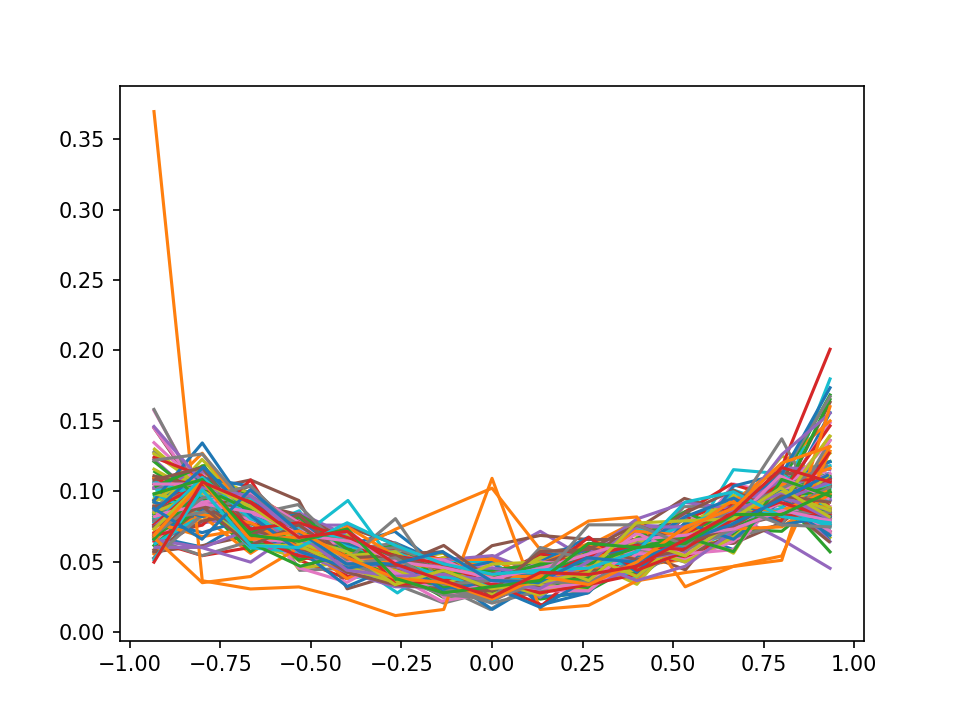

In [7]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

from scipy import stats


df = pd.read_csv('../data/cexport.csv')

plt.figure()

slopes = []

for colname in df.columns:
    if 'close' in colname:
        hist, edges = np.histogram(df[df[colname] > -999][colname], bins=15)
        hist = hist / np.sum(hist)
        edgebar = []
        raw_edges = []
        logvalues = []
        for lower, upper, val in zip(edges[:-1], edges[1:], hist):
            edgebar.append((lower+upper)/2) #/(2*np.mean(edges)))
            raw_edges.append((lower+upper)/2)
            logvalues.append(np.log10(val))
        slope, intercept, r_value, p_value, std_err = stats.linregress(edgebar, logvalues)
        if not np.isnan(slope):
            slopes.append(slope)
        plt.plot(edgebar, hist)
        plt.show()

<IPython.core.display.Javascript object>


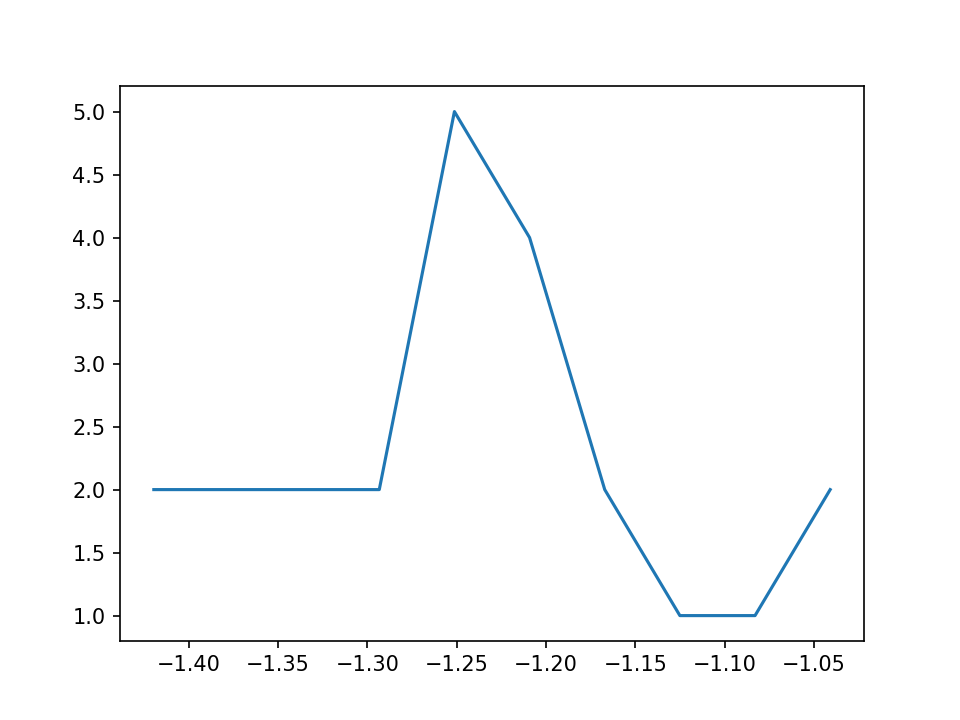

In [48]:
shist, sedges = np.histogram(slopes)

plt.figure()

plt.plot(sedges[:-1], shist)

plt.show()